<a href="https://colab.research.google.com/gist/ruvnet/38419ee3cb3fe4d5a7bd046ded1e1263/synth-ruv-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Data Generation with SDV

## Comprehensive Overview of Synthetic Data Generation with SDV
### created by @rUv, cause I could.

Synthetic data serves as an invaluable asset across diverse fields, enabling a myriad of applications while addressing privacy, scarcity, and regulatory challenges associated with real-world data. This notebook delves into the essence of synthetic data, its multifaceted uses, and the Synthetic Data Vault (SDV) library's role in its generation, presenting a thorough guide enriched with practical demonstrations.

## Understanding Synthetic Data

At its core, synthetic data is data fabricated algorithmically to mimic the statistical properties of authentic datasets. This artificial generation aims to produce data that can substitute real data in situations where original data may be sensitive, limited, or bound by privacy regulations. The process hinges on statistical models that analyze the distribution of real data to create new, similar data points.

## Applications of Synthetic Data

The versatility of synthetic data spans numerous domains, offering significant advantages in:

- **Privacy and Security:** It offers a privacy-compliant alternative to using real data, circumventing potential data breaches and ethical concerns.
- **Testing and Development:** Synthetic data provides ample data for rigorous software testing and the development of robust machine learning models, ensuring performance stability.
- **Data Augmentation:** It addresses the limitations of scarce real-world data, enhancing datasets to bolster model training and accuracy.
- **Research and Education:** Accessible synthetic data facilitates academic research and educational pursuits, especially when real datasets are unattainable or restricted.

## Leveraging SDV for Synthetic Data Generation

The Synthetic Data Vault (SDV) is an open-source Python library created by the Data to AI Lab at MIT for generating synthetic data. It supports creating synthetic versions of single tables, multiple related tables, and time-series data. SDV is ideal for use cases where real data is sensitive or regulated, providing a solution for privacy-preserving data sharing and machine learning.

Utilizing advanced modeling techniques, SDV aims to produce synthetic datasets that closely mimic the statistical properties of original datasets without compromising privacy. With ongoing contributions from an active community, SDV is continuously improved to meet the needs of researchers and data scientists focusing on ethical data usage.


### Featured Demonstrations in This Notebook:

- **Interactive Dataset Exploration:** Utilize dynamic widgets to select and inspect various demo datasets, understanding their structure and volume at a glance. This interactive exploration enables users to dynamically load and display the head of the dataset, offering immediate insights into the data's features and characteristics.

- **Synthetic Data Generation:** Generate synthetic versions of the selected real datasets using SDV's `SingleTablePreset` with various configurations, such as `FAST_ML` for quick machine learning-oriented synthesis. This step involves fitting the synthesizer to the real data and then sampling new data that mimics the statistical properties of the original dataset, showcasing the core capability of SDV to produce high-quality synthetic data.

- **Quality Evaluation:** Assess the fidelity of synthetic data through qualitative comparisons, employing SDV's evaluation metrics to gauge the resemblance to real data. The `evaluate_quality` function provides a comprehensive report, offering an overall score and detailed scores for aspects like "Column Shapes" and "Column Pair Trends," facilitating an understanding of the synthetic data's accuracy in replicating real data distributions.

- **Visual Insights:** Explore the utility of `get_column_plot` and `get_column_pair_plot` functions for visual comparisons between real and synthetic data distributions, enhancing interpretability and insight derivation. These visualizations allow users to compare individual column distributions and the relationships between pairs of columns across real and synthetic datasets, illustrating the effectiveness of synthetic data in mirroring complex data patterns.

### Available Demo Datasets:

Here's a snapshot of the datasets available for exploration and synthesis in this notebook:

| Dataset Name            | Size (MB) | # of Tables | Description and Purpose                                                      |
|-------------------------|-----------|------------------|------------------------------------------------------------------------------|
| KRK_v1                  | 0.06      | 1                | Chess Endgame Database for King-Rook vs. King endings; for game AI training. |
| adult                   | 3.91      | 1                | Census income dataset; used for predicting whether income exceeds 50K/yr.    |
| alarm                   | 4.52      | 1                | A synthetic medical diagnostic dataset; for alarm diagnosis systems.         |
| asia                    | 1.28      | 1                | A synthetic dataset based on the "Asia" Bayesian network; for medical research. |
| census                  | 98.17     | 1                | A larger census dataset for demographic studies and income prediction.       |
| census_extended         | 4.95      | 1                | An extended version of the census dataset with additional features.          |
| child                   | 3.20      | 1                | Synthetic dataset based on a Bayesian network for child disease diagnosis.   |
| covtype                 | 255.65    | 1                | Forest cover type dataset; for ecological region prediction based on cartographic variables. |
| credit                  | 68.35     | 1                | Credit approval dataset; for financial risk assessment and decision making.  |
| expedia_hotel_logs      | 0.20      | 1                | Hotel booking demand dataset; for analyzing customer booking dynamics.       |
| fake_companies          | 0.00      | 1                | Synthetic dataset of company profiles; for market analysis simulations.      |
| fake_hotel_guests       | 0.03      | 1                | Synthetic dataset mimicking hotel guest check-ins; for hospitality management and pricing strategies. |
| grid                    | 0.32      | 1                | Synthetic grid data; for power systems analysis and electrical grid simulations. |
| gridr                   | 0.32      | 1                | Another version of synthetic grid data; for redundancy and network reliability studies. |
| insurance               | 3.34      | 1                | Synthetic insurance data; for risk assessment and policy pricing models.     |
| intrusion               | 162.04    | 1                | Network intrusion dataset; for cybersecurity threat detection and analysis.  |
| mnist12                 | 81.20     | 1                | Downsampled MNIST digits; for image recognition and machine learning experiments. |
| mnist28                 | 439.60    | 1                | Full MNIST dataset; for deep learning and computer vision research.          |
| news                    | 18.71     | 1                | Synthetic news categorization dataset; for natural language processing and content classification. |
| ring                    | 0.32      | 1                | A simple geometric dataset; for clustering and pattern recognition algorithms. |
| student_placements      | 0.03      | 1                | Synthetic dataset on student job placements; for career counseling and educational outcome analysis. |
| student_placements_pii  | 0.03      | 1                | Similar to student_placements but with potentially identifiable information; for privacy-preserving data publishing research. |


This array of datasets, spanning from strategic games through demographic surveys to academic placements, offers a rich canvas for synthetic data generation experiments, providing a practical understanding of SDV's capabilities and the broader implications of synthetic data in technology and society.


# Install SDV

In [ ]:
# Install SDV
!pip install sdv

## Load Available Demo Data Sets

Dropdown(description='Dataset:', index=11, layout=Layout(width='50%'), options=('KRK_v1', 'adult', 'alarm', 'a…

Button(button_style='info', description='Load Dataset', style=ButtonStyle(button_color='lightblue'))

Output()

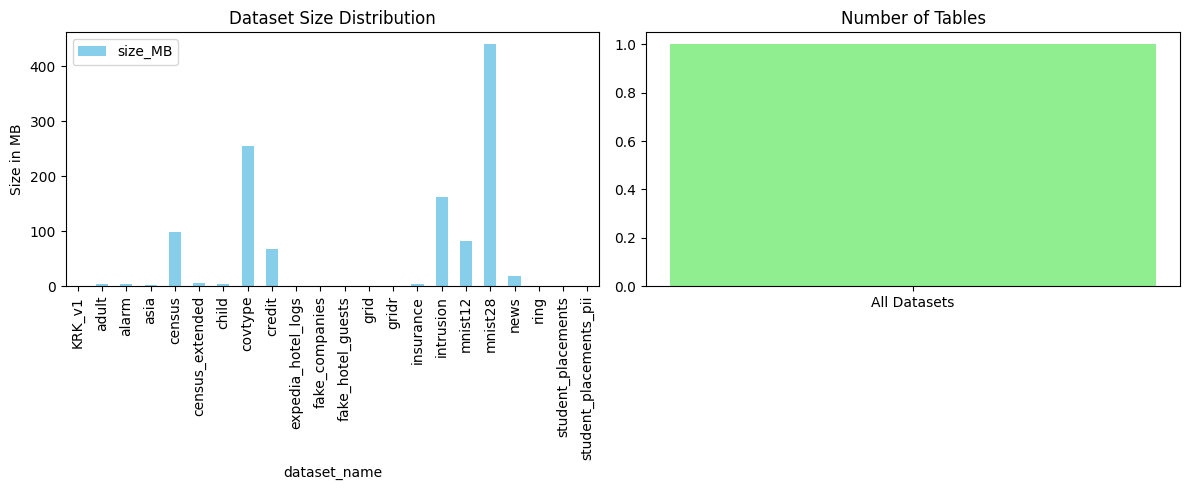

Accordion(children=(Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), …

In [68]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
from sdv.datasets.demo import download_demo, get_available_demos
import matplotlib.pyplot as plt
import pandas as pd

# Fetch available demo datasets for single_table modality
available_demos_df = get_available_demos('single_table')

# Function to load the first few rows of the dataset
def load_dataset_head(dataset_name):
    real_data, _ = download_demo(modality='single_table', dataset_name=dataset_name)
    return real_data.head()

# Function to display dataset details
def display_dataset_details(change):
    with dataset_details_output:
        clear_output(wait=True)
        dataset_row = available_demos_df[available_demos_df['dataset_name'] == change['new']].iloc[0]
        details_md = f"""
        **Dataset Name**: {dataset_row['dataset_name']}
        **Size (MB)**: {dataset_row['size_MB']}
        **Number of Tables**: {dataset_row['num_tables']}
        """
        display(Markdown(details_md))

# Output area for displaying selected dataset's details
dataset_details_output = widgets.Output()

# Create dropdown for dataset selection
demo_options = available_demos_df['dataset_name'].tolist()
dataset_dropdown = widgets.Dropdown(
    options=demo_options,
    value='fake_hotel_guests',  # Set 'fake_hotel_guests' as the default selection
    description='Dataset:',
)

# Observe changes in the dropdown to display dataset details dynamically
dataset_dropdown.observe(display_dataset_details, names='value')

# Visualize dataset characteristics
def visualize_dataset_characteristics():
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    available_demos_df.plot(kind='bar', x='dataset_name', y='size_MB', ax=ax[0], color='skyblue')
    ax[0].set_title('Dataset Size Distribution')
    ax[0].set_xticklabels(available_demos_df['dataset_name'], rotation=90)
    ax[0].set_ylabel('Size in MB')
    # Assuming all datasets have 1 table, otherwise, adjust the logic
    ax[1].bar(['All Datasets'], [1], color='lightgreen')
    ax[1].set_title('Number of Tables')
    plt.tight_layout()
    plt.show()

# Setup accordion for dataset preview
accordion = widgets.Accordion(children=[widgets.Output() for _ in demo_options])
for i, dataset_name in enumerate(demo_options):
    with accordion.children[i]:
        df_head = load_dataset_head(dataset_name)
        display(df_head)
    accordion.set_title(i, dataset_name)

# Styling
load_data_btn = widgets.Button(description="Load Dataset", button_style='info')  # Button to load the dataset
load_data_btn.style.button_color = 'lightblue'
dataset_dropdown.layout.width = '50%'

# Display everything
display(dataset_dropdown, load_data_btn, dataset_details_output)
visualize_dataset_characteristics()
display(accordion)


### (Optional) Alternative Demo Data Loading

In [69]:
from sdv.datasets.demo import get_available_demos

# Get available demo datasets for single_table modality
available_demos_df = get_available_demos('single_table')
print(available_demos_df)


              dataset_name  size_MB  num_tables
0                   KRK_v1     0.06           1
1                    adult     3.91           1
2                    alarm     4.52           1
3                     asia     1.28           1
4                   census    98.17           1
5          census_extended     4.95           1
6                    child     3.20           1
7                  covtype   255.65           1
8                   credit    68.35           1
9       expedia_hotel_logs     0.20           1
10          fake_companies     0.00           1
11       fake_hotel_guests     0.03           1
12                    grid     0.32           1
13                   gridr     0.32           1
14               insurance     3.34           1
15               intrusion   162.04           1
16                 mnist12    81.20           1
17                 mnist28   439.60           1
18                    news    18.71           1
19                    ring     0.32     

In [70]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from sdv.datasets.demo import download_demo, get_available_demos

# Function to load dataset and update `real_data` and `metadata` globally
def load_dataset(btn=None):
    global real_data, metadata  # Declare these as global to update the notebook state
    dataset_name = dataset_dropdown.value

    # Load demo dataset and update global variables
    real_data, metadata = download_demo(
        modality='single_table',
        dataset_name=dataset_name)

    # Clear previous outputs (if any) and display the new dataset's head
    with output_area:
        clear_output(wait=True)  # Clear the previous dataset's display
        display(real_data.head())

# Create dropdown for dataset selection
available_demos_df = get_available_demos('single_table')
demo_options = available_demos_df['dataset_name'].tolist()

# Check if 'fake_hotel_guests' is in the list of options and set it as the default value if so
default_value = 'fake_hotel_guests' if 'fake_hotel_guests' in demo_options else None

dataset_dropdown = widgets.Dropdown(
    options=demo_options,
    value=default_value,  # Set the default value
    description='Dataset:',
)

# Create a button to load the selected dataset
load_data_btn = widgets.Button(description="Load Dataset")

# Output area for displaying dataset's head
output_area = widgets.Output()

# Bind the load_dataset function to the button click event
load_data_btn.on_click(load_dataset)

# Initially load the default dataset
load_dataset()

# Display the UI components
display(widgets.VBox([dataset_dropdown, load_data_btn, output_area]))


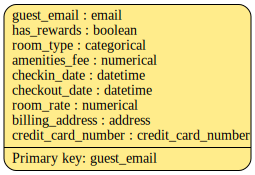

In [89]:
metadata.visualize()

In [91]:
from sdv.lite import SingleTablePreset

# Ensure this cell is run after the dataset has been selected and loaded using the UI above

# Check if 'real_data' and 'metadata' are available
if 'real_data' in globals() and 'metadata' in globals():
    # Create a synthesizer
    synthesizer = SingleTablePreset(metadata, name='FAST_ML')

    # Fit to the real data
    synthesizer.fit(data=real_data)

    print("Synthesizer is now fitted to the selected dataset.")
else:
    print("Please select and load a dataset using the dropdown and button above.")


Synthesizer is now fitted to the selected dataset.


In [92]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from sdv.lite import SingleTablePreset
from sdv.evaluation.single_table import evaluate_quality
# Ensure the following imports are present if you're using them
# from sdv.datasets.demo import download_demo, get_available_demos

# Assume real_data and metadata are already loaded by previous steps
# synthesizer = SingleTablePreset(metadata, name='FAST_ML')  # This line should be moved or adjusted

# IMPORTANT: This action should be performed after the dataset has been selected and loaded
# synthesizer.fit(real_data)  # Moved/adjusted to be called after dataset selection

# Global synthetic_data variable declaration
synthetic_data = None  # Initialize to None or an empty DataFrame if preferred

# Dropdown menu for selecting the number of rows to generate
num_rows_dropdown = widgets.Dropdown(
    options=[('100 rows', 100), ('500 rows', 500), ('1000 rows', 1000)],
    value=500,  # Default value
    description='Number of Rows:',
)

# Button to trigger synthetic data generation
generate_btn = widgets.Button(description='Generate Synthetic Data')

# Output area for displaying the synthetic data
output_area = widgets.Output()

def generate_synthetic_data(btn):
    global synthetic_data, synthesizer  # Include synthesizer to be recognized globally

    # Reinitialize the synthesizer with the current metadata and fit it to the real data
    synthesizer = SingleTablePreset(metadata, name='FAST_ML')
    synthesizer.fit(real_data)

    # Get the selected number of rows from the dropdown
    num_rows = num_rows_dropdown.value

    # Use the synthesizer object to generate synthetic data
    synthetic_data = synthesizer.sample(num_rows=num_rows)

    # Display the first few rows of the synthetic data in the output area
    with output_area:
        clear_output(wait=True)  # Clear previous outputs
        display(synthetic_data.head())

# Bind the generate_synthetic_data function to the button click event
generate_btn.on_click(generate_synthetic_data)

# Display the UI components
display(widgets.VBox([num_rows_dropdown, generate_btn, output_area]))

# Function to evaluate the quality of the generated synthetic data
# Ensure this is called after synthetic data has been generated
def evaluate_synthetic_data_quality():
    global real_data, metadata  # Make sure these are recognized globally in this context
    if synthetic_data is not None:
        quality_report = evaluate_quality(real_data, synthetic_data, metadata)
        print(quality_report)
    else:
        print("Synthetic data not generated. Please generate synthetic data first.")


### Confirm Synthetic Data Generation Schema

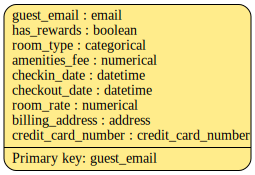

In [93]:
metadata.visualize()

### SingleTablePreset
The SingleTablePreset simplifies the process of setting up a synthesizer with predefined settings suitable for common data synthesis tasks. By specifying 'FAST_ML', you're opting for a configuration that aims to quickly generate synthetic data, making it a good choice for experimentation, model training, or scenarios where you need synthetic data rapidly and can tolerate some compromises on the exactness of the data distribution compared to the original dataset.

In summary, this code is used to prepare a synthesizer with settings optimized for fast machine learning tasks, ready to be fitted to real data (using its fit method) and then used to generate synthetic datasets.

In [94]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

## Evaluate the quality of synthetic data against real data.
This code cell utilizes the SDV (Synthetic Data Vault) library to evaluate the quality of synthetic data against real data. It employs the `evaluate_quality` function from the `sdv.evaluation.single_table` module, which generates a quality report by comparing various statistical properties of the synthetic dataset with the real dataset.

The evaluation includes assessments of column shapes and column pair trends, culminating in an overall quality score expressed as a percentage. This score provides a quantifiable measure of how closely the synthetic data mimics the real data, aiding in the validation of synthetic data generation methods.


In [95]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 149.91it/s]

Overall Score: 89.53%

Properties:
- Column Shapes: 91.76%
- Column Pair Trends: 87.29%


## Fidelity of the synthetic data
The `quality_report.get_details('Column Shapes')` method call retrieves detailed results from the quality evaluation report for the "Column Shapes" property.

This part of the evaluation focuses on comparing the distribution of individual columns in the synthetic dataset to their counterparts in the real dataset. It assesses how well the synthetic data replicates the shape of the real data distributions, including aspects such as mean, variance, skewness, and kurtosis.

This detailed analysis provides insights into the fidelity of the synthetic data at the level of individual columns, highlighting areas where the synthetic data generation process excels or may need improvement.


In [96]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,has_rewards,TVComplement,0.976000
1,room_type,TVComplement,0.914000
2,amenities_fee,KSComplement,0.931136
3,checkin_date,KSComplement,0.934000
4,checkout_date,KSComplement,0.918750
5,room_rate,KSComplement,0.832000


## Anonymization

When working with datasets containing personal information, protecting sensitive data becomes crucial. The original dataset included columns with potentially identifiable information such as guest email, billing address, and phone number. To address privacy concerns, the synthetic dataset ensures these columns are **fully anonymized**. The anonymization process generates entirely fake yet format-consistent values, making the synthetic data safe for broader use while preserving the utility for analysis and machine learning tasks.

The following code snippet demonstrates an approach to dynamically identify and handle sensitive columns in a dataset based on a simple naming convention (e.g., columns starting with "V" considered sensitive). It also illustrates how to exclude certain columns from being labeled as sensitive, ensuring flexibility in managing data privacy.


In [99]:
print(real_data.columns)

# Assuming a naming convention where columns starting with "V" might contain sensitive data
# Dynamically generate a list of sensitive columns based on this convention
# Exclude specific non-sensitive columns explicitly if necessary
excluded_columns = ['room_rate', 'has_rewards']  # Example of columns you might want to exclude

# Update the criteria for identifying sensitive columns based on actual dataset
sensitive_column_names = ['billing_address', 'credit_card_number']

# Checking and displaying sensitive columns if they exist in the dataset
if any(col in real_data.columns for col in sensitive_column_names):
    # Safely access and display the identified sensitive columns
    display(real_data[sensitive_column_names].head(3))
else:
    print("No sensitive columns (based on the specified criteria) are present in the dataset.")


Index(['guest_email', 'has_rewards', 'room_type', 'amenities_fee',
       'checkin_date', 'checkout_date', 'room_rate', 'billing_address',
       'credit_card_number'],
      dtype='object')


,billing_address,credit_card_number
0,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380


The expression `synthetic_data[sensitive_column_names].head(3)` is used to display the first three rows of the specified sensitive columns from the synthetic dataset.

Here, `synthetic_data` refers to the DataFrame containing the synthetic data generated by a data synthesis tool or method. `sensitive_column_names` is a list of column names that have been designated as containing sensitive information, such as personal identifiers or confidential data. By indexing `synthetic_data` with `sensitive_column_names` and applying the `head(3)` method, this expression provides a quick snapshot of how the synthetic data appears for these sensitive fields, aiding in the assessment of the synthetic data's quality and the effectiveness of any anonymization or data protection techniques applied during the data generation process.


In [100]:
synthetic_data[sensitive_column_names].head(3)

,billing_address,credit_card_number
0,"90469 Karla Knolls Apt. 781\nSusanberg, CA 70033",5161033759518983
1,"6108 Carla Ports Apt. 116\nPort Evan, MI 71694",4133047413145475690
2,86709 Jeremy Manors Apt. 786\nPort Garychester...,4977328103788


## Visualize the Sytthetic Data vs Real Data
This snippet of code demonstrates how to visualize and compare the distribution of values in a specific column (`'amenities_fee'`) between the real dataset (`real_data`) and the synthetic dataset (`synthetic_data`). It employs the `get_column_plot` function from the `sdv.evaluation.single_table` module of the Synthetic Data Vault (SDV) library. This function is designed to create a plot that illustrates how closely the synthetic data replicates the statistical properties of the real data for a given column. The `metadata` parameter provides the necessary context about the data, such as column data types and relationships, which the function uses to accurately generate the plot. By calling `fig.show()`, the plot is displayed, offering a visual comparison between the real and synthetic data distributions for the `'amenities_fee'` column. This visualization aids in assessing the quality of the synthetic data generation process, specifically in terms of its ability to capture and reproduce the characteristics of individual columns in the dataset.


In [77]:
from sdv.evaluation.single_table import get_column_plot

# Visualize real vs synthetic data
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='amenities_fee',
    metadata=metadata
)
fig.show()

## Visualize Pair Plot
The code snippet demonstrates the use of the `get_column_pair_plot` function from the `sdv.evaluation.single_table` module within the Synthetic Data Vault (SDV) library to visually compare the relationship between two specific columns, `'checkin_date'` and `'checkout_date'`, in both real and synthetic datasets. This function is designed to create a plot that illustrates the joint distribution or any potential correlation between the pair of columns specified in the `column_names` parameter, for both the real dataset (`real_data`) and the synthetic dataset (`synthetic_data`). The `metadata` parameter is utilized to provide the function with necessary contextual information about the dataset, such as the data types of the columns and any relationships between them.

By invoking `fig.show()`, the generated plot is displayed, offering a visual assessment of how well the synthetic data mimics the real data in terms of the relationship between the two columns of interest. This is particularly useful for evaluating the effectiveness of the synthetic data generation process in preserving inter-column dependencies, trends, and patterns that exist in the original data.


In [ ]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['checkin_date', 'checkout_date'],
    metadata=metadata
)

fig.show()

# Making Synthetic Data and Synthesizer Model Available for Download

After generating synthetic data and potentially saving a synthesizer model, you'll likely want to make these files available for download.  

In [98]:
from google.colab import files
import pandas as pd

# Get a list of all column names in the synthetic_data DataFrame
existing_columns = synthetic_data.columns.tolist()

# Filter the sensitive_column_names list to include only columns present in synthetic_data
filtered_sensitive_column_names = [col for col in sensitive_column_names if col in existing_columns]

# Now, create the subset using the filtered list of sensitive column names
sensitive_data_subset = synthetic_data[filtered_sensitive_column_names]
sensitive_data_subset.to_csv('sensitive_synthetic_data.csv', index=False)

# Proceed with offering the files for download
files.download('complete_synthetic_data.csv')  # Download the complete synthetic dataset
files.download('sensitive_synthetic_data.csv')  # Download the filtered sensitive data subset


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>